In [10]:
import numpy as np
import matplotlib.pyplot as plt
import numexpr as ne
from joblib import Parallel, delayed

In [2]:
energy = 1000
wavel = (1240/energy)*10**(-9)
z = 5e-6
N = 5000
L = 5e-6
in_wave = np.zeros(N)
in_wave[int(N/2)-int(N/8):int(N/2)+int(N/8)] = 1
out_wave = np.zeros((N),dtype='complex128')
pi = np.pi

In [3]:
'''
for i in range(N):
    for j in range(N):
        x = domain[j]
        f = in_wave[j]
        x1 = domain[i]
        out_wave[i] += f*np.exp((-1j*pi*x*x)/(wavel*z))*np.exp((-1j*2*pi*x*x1)/(wavel*z))
        #out_wave[i] += ne.evaluate('f*exp((-1j*pi*x*x)/(wavel*z))*exp((-1j*2*pi*x*x1)/(wavel*z))')
out_wave *= 1/np.sqrt(1j*wavel*z)*step
'''

"\nfor i in range(N):\n    for j in range(N):\n        x = domain[j]\n        f = in_wave[j]\n        x1 = domain[i]\n        out_wave[i] += f*np.exp((-1j*pi*x*x)/(wavel*z))*np.exp((-1j*2*pi*x*x1)/(wavel*z))\n        #out_wave[i] += ne.evaluate('f*exp((-1j*pi*x*x)/(wavel*z))*exp((-1j*2*pi*x*x1)/(wavel*z))')\nout_wave *= 1/np.sqrt(1j*wavel*z)*step\n"

In [4]:
def exact_prop(in_wave,out_wave,L_in,L_out,wavel,z):
    N_in = np.shape(in_wave)[0]
    xlim_in = L_in/2
    in_domain = np.linspace(-xlim_in,xlim_in,N_in)
    N_out = np.shape(out_wave)[0]
    xlim_out = L_out/2
    out_domain = np.linspace(-xlim_out,xlim_out,N_out)
    step_out = 2*xlim_out/N_out
    for i in range(N):
        for j in range(N):
            x = in_domain[j]
            f = in_wave[j]
            x1 = out_domain[i]
            out_wave[i] += f*np.exp((-1j*pi*x*x)/(wavel*z))*np.exp((-1j*2*pi*x*x1)/(wavel*z))
            #out_wave[i] += ne.evaluate('f*exp((-1j*pi*x*x)/(wavel*z))*exp((-1j*2*pi*x*x1)/(wavel*z))')
    out_wave *= 1/np.sqrt(1j*wavel*z)*step_out
    return

In [5]:
exact_prop(in_wave,out_wave,L,L,wavel,z)

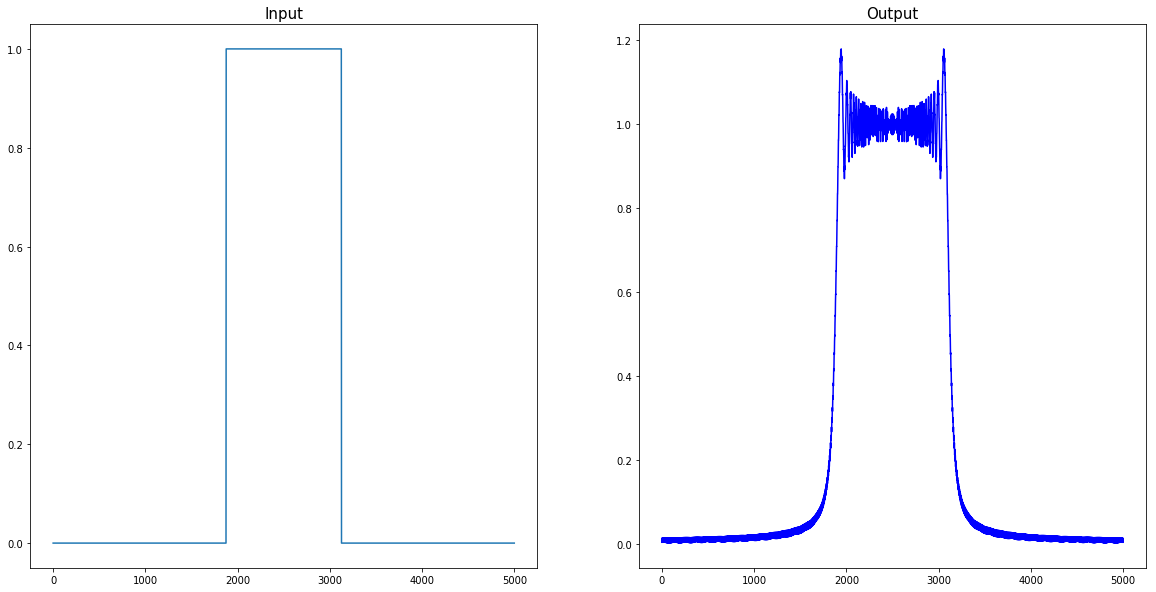

In [6]:
f, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(np.abs(in_wave))
ax1.set_title('Input', fontsize = 15)
ax2.plot(np.abs(out_wave),'b')
#ax2.plot(out_domain*1e6,np.angle(o),'g')
ax2.set_title('Output', fontsize = 15)
f.set_size_inches(20, 10, forward=True)
#f.suptitle('Fresnel Number : '+str((xlim**2)/(wavel*z)),fontsize = 25)
plt.show()

In [7]:
%run prop_1d_spectral.py

In [8]:
temp,L = propTF(in_wave,L/N,L/N,wavel,z)

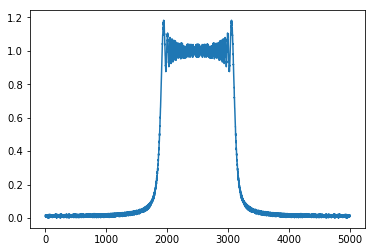

In [9]:
plt.plot(np.abs(temp))
plt.show()